## Banking Loan Subscription:
## Predicting Customer Subscription And Categorizing Customers Based on Call Duration and Subscription.

### 1. DESCRIPTION OF PORTUGESE BANK MARKETING DATASET
Taken from UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/bank+marketing

Source:

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014


Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There are four datasets: 
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


Attribute Information:

Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone') 
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric) 
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')


Relevant Papers:

S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimaraes, Portugal, October, 2011. EUROSIS. [bank.zip]



Citation Request:

This dataset is public available for research. The details are described in [Moro et al., 2014]. 
Please include this citation if you plan to use this database: 

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

### 1.1 LOADING DATA & REQUIRED PACKAGES

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import time

# Import data cleaning and model accuracy tools
#from sklearn.model_selection import train_test_split # Splits data
from sklearn.preprocessing import LabelEncoder # Convert categor. to numeric
from sklearn.metrics import confusion_matrix # Confusion matrix
from sklearn.metrics import accuracy_score # Test accuracy of model predoctions
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn import metrics
# Dimension reduction
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Import models
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

# Data Viz
import matplotlib.pyplot as plt
import seaborn as sns   
#import altair as alt
#alt.renderers.enable('notebook') # Enabled Altair to work in notebook

### 1.1 DATASET USED IN THIS PROJECT
##### bank-additional-full.csv
##### 41188 instances and 20 potential predictor variables, ordered by date (from May 2008 to November 2010)
##### Very similar to the data analyzed in [Moro et al., 2014] 
S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing.

In [2]:
# Import data
df = pd.read_csv("C:/Users/david/Desktop/Project_Anylit_&_Algos/bank/bank-additional-full.csv", encoding = "ISO-8859-1")   

### 1.2 EXPLORING VARIABLES 

In [8]:
x=1
print("1 to 20 are predictor variables, y is the target i.e. subscribed to loan deposit yes/no.\n")
for col in df.columns:
    print(x,"  ",col)
    x+=1

1 to 20 are predictor variables, y is the target i.e. subscribed to loan deposit yes/no.

1    age
2    job
3    marital
4    education
5    default
6    housing
7    loan
8    contact
9    month
10    day_of_week
11    duration
12    campaign
13    pdays
14    previous
15    poutcome
16    emp.var.rate
17    cons.price.idx
18    cons.conf.idx
19    euribor3m
20    nr.employed
21    y


### 1.3 DATATYPES by COLUMN
Object-datatype columns need to be transformed to Numeric-datatypes for machine learning use.

In [9]:
print(df.dtypes) 

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


### 1.4 EXPLORING THE CATEGORICAL VARIABLES

In [10]:
def get_unique(col):
    print("\nCOLUMN:",col)
    print("COUNT UNIQUE VALUES:",len(df[col].unique()))
    print("UNIQUE VALUES:",df[col].unique())

In [11]:
for col in df.columns:
    if df[col].dtype == object:
        get_unique(col)


COLUMN: job
COUNT UNIQUE VALUES: 12
UNIQUE VALUES: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

COLUMN: marital
COUNT UNIQUE VALUES: 4
UNIQUE VALUES: ['married' 'single' 'divorced' 'unknown']

COLUMN: education
COUNT UNIQUE VALUES: 8
UNIQUE VALUES: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

COLUMN: default
COUNT UNIQUE VALUES: 3
UNIQUE VALUES: ['no' 'unknown' 'yes']

COLUMN: housing
COUNT UNIQUE VALUES: 3
UNIQUE VALUES: ['no' 'yes' 'unknown']

COLUMN: loan
COUNT UNIQUE VALUES: 3
UNIQUE VALUES: ['no' 'yes' 'unknown']

COLUMN: contact
COUNT UNIQUE VALUES: 2
UNIQUE VALUES: ['telephone' 'cellular']

COLUMN: month
COUNT UNIQUE VALUES: 10
UNIQUE VALUES: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

COLUMN: day_of_week
COUNT UNIQUE VALUES: 5
UNIQUE VALUES: ['mon' 'tue' 'wed' 'thu' 'fri']

COLUMN: po

#### DROP UNHELPFUL COLUMNS

### 1.5 CONVERTING CATEGORICAL VARIABLES TO NUMERIC

### 1.6 BINARY CATEGORICAL TO NUMBER.
4 Columns are categorical variables with only two levels: "yes" or "no". We use Sklearn LabelEncoder to convert these to numeric 1 or 0.
default, housing, loan and y(target variable).

In [12]:
number = LabelEncoder()
df["default"] = number.fit_transform(df["default"].astype('str'))
df["housing"] = number.fit_transform(df["housing"].astype('str'))
df["loan"] = number.fit_transform(df["loan"].astype('str'))
df["y"] = number.fit_transform(df["y"].astype('str'))

### 1.7 MONTH STRING VALUES
The month column was converted from string values to integer values

In [13]:
the_months = {'may': 5,'jun': 6, 'jul': 7, 'aug': 8, 'oct': 10, 'nov': 11, 'dec': 12,  'jan': 1, 'feb': 2,\
              'mar': 3, 'apr': 4, 'sep': 9} # Dictionary for mapping values

def numeric_months(value): # function maps the dictionary the_months
    return the_months[value] 

df["month"] = df["month"].apply(numeric_months) # convert column

### 1.8 ONE HOT ENCODING
5 columns with string categoricals remain. One Hot Encoding was used to create new variables for each. The columns were job, marital, education, contact and poutcome.

In [14]:
df = pd.get_dummies(df) # One hot encoding all remaining variables

In [15]:
# Check to see we have numerics for all variables
print(df.dtypes) 

age                                int64
default                            int32
housing                            int32
loan                               int32
month                              int64
duration                           int64
campaign                           int64
pdays                              int64
previous                           int64
emp.var.rate                     float64
cons.price.idx                   float64
cons.conf.idx                    float64
euribor3m                        float64
nr.employed                      float64
y                                  int32
job_admin.                         uint8
job_blue-collar                    uint8
job_entrepreneur                   uint8
job_housemaid                      uint8
job_management                     uint8
job_retired                        uint8
job_self-employed                  uint8
job_services                       uint8
job_student                        uint8
job_technician  

### 2. MACHINE LEARNING ALGORITHMS: PREDICTING LOAN SUBSCRIPTION 
##### LOGISTIC REGRESSION
##### K NEAREST NEIGHBOURS
##### GRADIENT BOOSTING CLASSIFIER
##### RANDOM FOREST CLASSSIFIER
##### SUPPORT VECTOR MACHINE
##### NEURAL NETWORK


### 2.1 SPLIT TRAIN TEST

In [11]:
times = []# to store completion times
models = []# To store accuracy stats
# Split into train/test set
test = df.sample(frac=0.2, replace=False, random_state=1)# 20% of data, without replacement, random seed
train = df.drop(test.index)

In [12]:
train_X = train.drop(columns=['y'])
train_y = train['y']
test_X = test.drop(columns=['y'])
test_y = test['y']

### 2.2 STANDARDIZE DATA

In [13]:
import warnings# Note i need to convert columns to get rid of these warnings 
warnings.filterwarnings('ignore')
scaler = StandardScaler()
scaler.fit(train_X) # fit scaler with training
train_X[train_X.columns] = scaler.transform(train_X[train_X.columns]) # transform training
test_X[test_X.columns] = scaler.transform(test_X[test_X.columns])# transform test

### 2.3 LOGISTIC REGRESSION

In [15]:
start = time.time()#timing
model_LOGREG = LogisticRegression(solver='liblinear') 
model_LOGREG.fit(train_X,train_y)
pred_LOGREG = model_LOGREG.predict(test_X)
end = time.time()#timing
completion_time = round(end - start,1)
print(completion_time)
times.append(("Logistic Regression",completion_time))

1.0



LOGISTIC REGRESSION MODEL: 
Accuracy = 91.0 
ROC Accuracy = 70.0

Precision = 0.66 
Recall = 0.42 
F1-score = 0.52


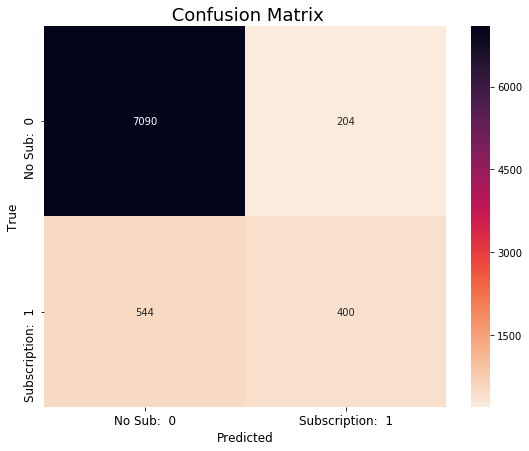

In [16]:
acc, roc = round(accuracy_score(test_y, pred_LOGREG),2)*100, round(roc_auc_score(test_y, pred_LOGREG),2)*100
precision, recall, f1score, support = metrics.precision_recall_fscore_support(test_y, pred_LOGREG)
precision, recall, f1score = round(precision[1],2), round(recall[1],2), round(f1score[1],2)
models.append(("Logistic Regression",acc,roc,precision, recall, f1score))
print("\nLOGISTIC REGRESSION MODEL:","\nAccuracy =",acc,"\nROC Accuracy =",roc)
print("\nPrecision =",precision,"\nRecall =",recall,"\nF1-score =",f1score)
cm = metrics.confusion_matrix(test_y, pred_LOGREG)
cmap = sns.cm.rocket_r
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(cm,annot=True, ax=ax, fmt='g',cmap=cmap); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted',size=12);ax.set_ylabel('True',size=12); 
ax.set_title(' Confusion Matrix',size=18); 
ax.xaxis.set_ticklabels(['No Sub:  0', 'Subscription:  1'],size=12); ax.yaxis.set_ticklabels(['No Sub:  0', 'Subscription:  1'],size=12);

### 2.4 KNN

In [17]:
start = time.time()#timing
model_KNN = KNeighborsClassifier(n_neighbors=5) 
model_KNN.fit(train_X,train_y)
pred_KNN = model_KNN.predict(test_X)
end = time.time()#timing
completion_time = round(end - start,1)
print(completion_time)
times.append(("K Nearest Neighbours",completion_time))

28.4



K NEAREST NEIGHBOURS MODEL: 
Accuracy = 90.0 
ROC Accuracy = 63.0

Precision = 0.6 
Recall = 0.3 
F1-score = 0.4


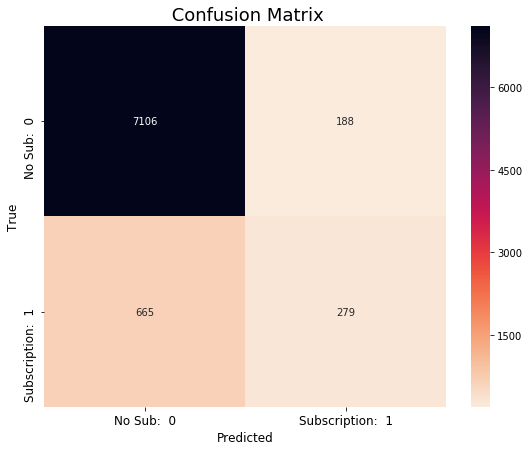

In [18]:
acc, roc = round(accuracy_score(test_y, pred_KNN),2)*100, round(roc_auc_score(test_y, pred_KNN),2)*100
precision, recall, f1score, support = metrics.precision_recall_fscore_support(test_y, pred_KNN)
precision, recall, f1score = round(precision[1],2), round(recall[1],2), round(f1score[1],2)
models.append(("K Nearest Neighbours",acc,roc,precision, recall, f1score))
print("\nK NEAREST NEIGHBOURS MODEL:","\nAccuracy =",acc,"\nROC Accuracy =",roc)
print("\nPrecision =",precision,"\nRecall =",recall,"\nF1-score =",f1score)
cm = metrics.confusion_matrix(test_y, pred_KNN)
cmap = sns.cm.rocket_r
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(cm,annot=True, ax=ax, fmt='g',cmap=cmap); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted',size=12);ax.set_ylabel('True',size=12); 
ax.set_title(' Confusion Matrix',size=18); 
ax.xaxis.set_ticklabels(['No Sub:  0', 'Subscription:  1'],size=12); ax.yaxis.set_ticklabels(['No Sub:  0', 'Subscription:  1'],size=12);

### 2.5 RANDOM FOREST CLASSIFIER

In [19]:
start = time.time()#timing
model_RFC = RandomForestClassifier(n_estimators=100) 
model_RFC.fit(train_X,train_y)
pred_RFC = model_RFC.predict(test_X)
end = time.time()#timing
completion_time = round(end - start,1)
print(completion_time)
times.append(("Random Forest Classifier",completion_time))

6.3



RANDOM FOREST CLASSIFIER: 
Accuracy = 91.0 
ROC Accuracy = 71.0

Precision = 0.66 
Recall = 0.46 
F1-score = 0.54


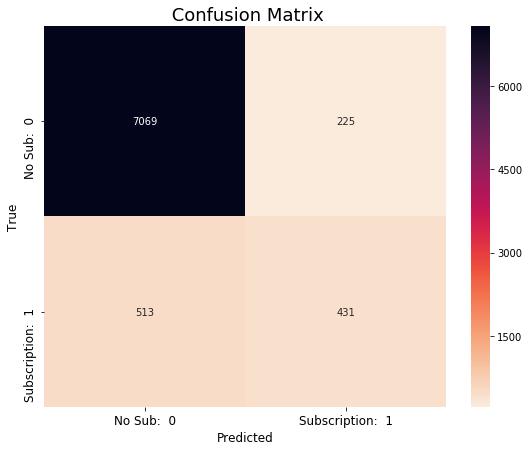

In [20]:
acc, roc = round(accuracy_score(test_y, pred_RFC),2)*100, round(roc_auc_score(test_y, pred_RFC),2)*100
precision, recall, f1score, support = metrics.precision_recall_fscore_support(test_y, pred_RFC)
precision, recall, f1score = round(precision[1],2), round(recall[1],2), round(f1score[1],2)
models.append(("Random Forest Classifier",acc,roc,precision, recall, f1score))
print("\nRANDOM FOREST CLASSIFIER:","\nAccuracy =",acc,"\nROC Accuracy =",roc)
print("\nPrecision =",precision,"\nRecall =",recall,"\nF1-score =",f1score)
cm = metrics.confusion_matrix(test_y, pred_RFC)
cmap = sns.cm.rocket_r
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(cm,annot=True, ax=ax, fmt='g',cmap=cmap); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted',size=12);ax.set_ylabel('True',size=12); 
ax.set_title(' Confusion Matrix',size=18); 
ax.xaxis.set_ticklabels(['No Sub:  0', 'Subscription:  1'],size=12); ax.yaxis.set_ticklabels(['No Sub:  0', 'Subscription:  1'],size=12);

### 2.6 GRADIENT BOOSTING CLASSIFIER

In [21]:
start = time.time()#timing
model_GBC = GradientBoostingClassifier()
model_GBC.fit(train_X, train_y)
pred_GBC = model_GBC.predict(test_X)
end = time.time()#timing
completion_time = round(end - start,1)
print(completion_time)
times.append(("Gradient Boosting Classifier",completion_time))

7.5



GRADIENT BOOSTING CLASSIFIER: 
Accuracy = 92.0 
ROC Accuracy = 75.0

Precision = 0.68 
Recall = 0.54 
F1-score = 0.6


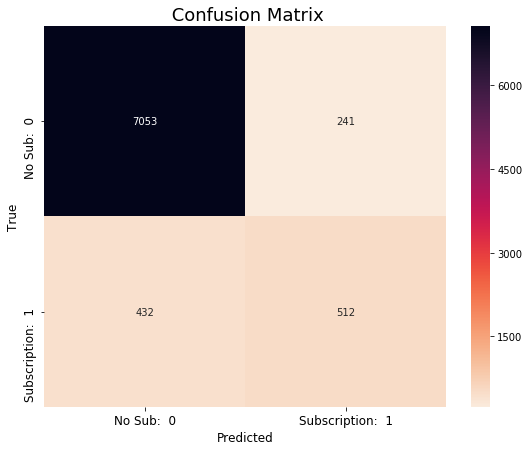

In [22]:
acc, roc = round(accuracy_score(test_y, pred_GBC),2)*100, round(roc_auc_score(test_y, pred_GBC),2)*100
precision, recall, f1score, support = metrics.precision_recall_fscore_support(test_y, pred_GBC)
precision, recall, f1score = round(precision[1],2), round(recall[1],2), round(f1score[1],2)
models.append(("Gradient Boosting Classifier",acc,roc,precision, recall, f1score))
print("\nGRADIENT BOOSTING CLASSIFIER:","\nAccuracy =",acc,"\nROC Accuracy =",roc)
print("\nPrecision =",precision,"\nRecall =",recall,"\nF1-score =",f1score)
cm = metrics.confusion_matrix(test_y, pred_GBC)
cmap = sns.cm.rocket_r
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(cm,annot=True, ax=ax, fmt='g',cmap=cmap); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted',size=12);ax.set_ylabel('True',size=12); 
ax.set_title(' Confusion Matrix',size=18); 
ax.xaxis.set_ticklabels(['No Sub:  0', 'Subscription:  1'],size=12); ax.yaxis.set_ticklabels(['No Sub:  0', 'Subscription:  1'],size=12);

### 2.7 SUPPORT VECTOR MACHINE

In [23]:
start = time.time()#timing
model_SVM = svm.SVC(gamma='scale')
model_SVM.fit(train_X, train_y)  
pred_SVM = model_SVM.predict(test_X)
end = time.time()#timing
completion_time = round(end - start,1)
print(completion_time)
times.append(("Support Vector Machine",completion_time))

49.3



SUPPORT VECTOR MACHINE: 
Accuracy = 91.0 
ROC Accuracy = 67.0

Precision = 0.67 
Recall = 0.36 
F1-score = 0.47


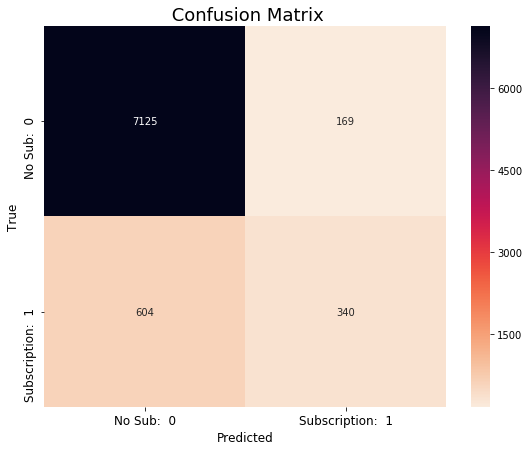

In [24]:
acc, roc = round(accuracy_score(test_y, pred_SVM),2)*100, round(roc_auc_score(test_y, pred_SVM),2)*100
precision, recall, f1score, support = metrics.precision_recall_fscore_support(test_y, pred_SVM)
precision, recall, f1score = round(precision[1],2), round(recall[1],2), round(f1score[1],2)
models.append(("Suport Vector Machine",acc,roc,precision, recall, f1score))
print("\nSUPPORT VECTOR MACHINE:","\nAccuracy =",acc,"\nROC Accuracy =",roc)#Support Vector Machine
print("\nPrecision =",precision,"\nRecall =",recall,"\nF1-score =",f1score)
cm = metrics.confusion_matrix(test_y, pred_SVM)
cmap = sns.cm.rocket_r
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(cm,annot=True, ax=ax, fmt='g',cmap=cmap); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted',size=12);ax.set_ylabel('True',size=12); 
ax.set_title(' Confusion Matrix',size=18); 
ax.xaxis.set_ticklabels(['No Sub:  0', 'Subscription:  1'],size=12); ax.yaxis.set_ticklabels(['No Sub:  0', 'Subscription:  1'],size=12);

### 2.8 NEURAL NETWORK

In [25]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [26]:
num_inputs_layer1 = len(train_X.columns)
print(num_inputs_layer1)

48


In [27]:
train_X_NN = train_X.values # NN will use numpy arrays instead of pandas
train_y_NN = train_y.values.T

In [28]:
start = time.time()
# create model
model = Sequential()
model.add(Dense(4, input_dim=num_inputs_layer1, kernel_initializer="uniform", activation='relu'))
model.add(Dense(6, kernel_initializer="uniform", activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
# Fit the model
model.fit(train_X_NN, train_y, epochs = 30, batch_size=10,  verbose=2)
end = time.time()
completion_time = round(end - start,1)
print(completion_time)
times.append(("Neural Network",completion_time))

Epoch 1/30
 - 7s - loss: 0.2357 - acc: 0.8949
Epoch 2/30
 - 4s - loss: 0.2019 - acc: 0.9065
Epoch 3/30
 - 5s - loss: 0.1979 - acc: 0.9090
Epoch 4/30
 - 4s - loss: 0.1965 - acc: 0.9089
Epoch 5/30
 - 4s - loss: 0.1959 - acc: 0.9093
Epoch 6/30
 - 4s - loss: 0.1952 - acc: 0.9103
Epoch 7/30
 - 4s - loss: 0.1941 - acc: 0.9106
Epoch 8/30
 - 4s - loss: 0.1938 - acc: 0.9107
Epoch 9/30
 - 4s - loss: 0.1933 - acc: 0.9103
Epoch 10/30
 - 4s - loss: 0.1929 - acc: 0.9105
Epoch 11/30
 - 5s - loss: 0.1927 - acc: 0.9109
Epoch 12/30
 - 4s - loss: 0.1921 - acc: 0.9114
Epoch 13/30
 - 4s - loss: 0.1919 - acc: 0.9103
Epoch 14/30
 - 4s - loss: 0.1922 - acc: 0.9105
Epoch 15/30
 - 4s - loss: 0.1916 - acc: 0.9112
Epoch 16/30
 - 4s - loss: 0.1917 - acc: 0.9106
Epoch 17/30
 - 4s - loss: 0.1911 - acc: 0.9114
Epoch 18/30
 - 4s - loss: 0.1912 - acc: 0.9109
Epoch 19/30
 - 4s - loss: 0.1908 - acc: 0.9119
Epoch 20/30
 - 4s - loss: 0.1906 - acc: 0.9119
Epoch 21/30
 - 4s - loss: 0.1906 - acc: 0.9113
Epoch 22/30
 - 4s - lo

In [29]:
#test_X = test_X.values
pred_NN = model.predict(test_X)

In [30]:
pred_NN = pd.Series([1 if x > 0.499 else 0 for x in pred_NN])


NEURAL NETWORK: 
Accuracy = 91.0 
ROC Accuracy = 75.0

Precision = 0.61 
Recall = 0.54 
F1-score = 0.57


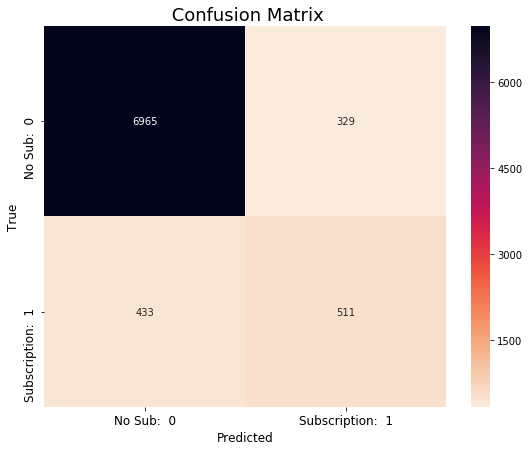

In [31]:
acc, roc = round(accuracy_score(test_y, pred_NN),2)*100, round(roc_auc_score(test_y, pred_NN),2)*100
precision, recall, f1score, support = metrics.precision_recall_fscore_support(test_y, pred_NN)
precision, recall, f1score = round(precision[1],2), round(recall[1],2), round(f1score[1],2)
models.append(("Neural Network",acc,roc,precision, recall, f1score))
print("\nNEURAL NETWORK:","\nAccuracy =",acc,"\nROC Accuracy =",roc)#Support Vector Machine
print("\nPrecision =",precision,"\nRecall =",recall,"\nF1-score =",f1score)
cm = metrics.confusion_matrix(test_y, pred_NN)
cmap = sns.cm.rocket_r
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(cm,annot=True, ax=ax, fmt='g',cmap=cmap); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted',size=12);ax.set_ylabel('True',size=12); 
ax.set_title(' Confusion Matrix',size=18); 
ax.xaxis.set_ticklabels(['No Sub:  0', 'Subscription:  1'],size=12); ax.yaxis.set_ticklabels(['No Sub:  0', 'Subscription:  1'],size=12);

### 2.9 Categorizing Decision Models.

In [32]:
models_df  = pd.DataFrame(columns = ["Algoithm","Accuracy","ROC Accuracy","Precsion","Recall","F1-score"])
for row in models:
    models_df.loc[len(models_df)] = row
models_df.sort_values("ROC Accuracy", ascending=False)

,Algoithm,Accuracy,ROC Accuracy,Precsion,Recall,F1-score
3,Gradient Boosting Classifier,92.0,75.0,0.68,0.54,0.60
5,Neural Network,91.0,75.0,0.61,0.54,0.57
2,Random Forest Classifier,91.0,71.0,0.66,0.46,0.54
0,Logistic Regression,91.0,70.0,0.66,0.42,0.52
4,Suport Vector Machine,91.0,67.0,0.67,0.36,0.47
1,K Nearest Neighbours,90.0,63.0,0.60,0.30,0.40


### ALGORITHM COMPLETION TIMES

In [33]:
times_df  = pd.DataFrame(columns = ["Algoithm","Completion Time"])
for row in times:
    times_df.loc[len(times_df)] = row
times_df.sort_values("Completion Time", ascending=False)

,Algoithm,Completion Time
5,Neural Network,126.5
4,Support Vector Machine,49.3
1,K Nearest Neighbours,28.4
3,Gradient Boosting Classifier,7.5
2,Random Forest Classifier,6.3
0,Logistic Regression,1.0


### 3. ASSESSING THE IMPORTANCE OF CALL DURATION VARIABLE
Call Duration is the most impotant factor in all tests.

### 3.1 LINEAR CORRELATION LEVELS

In [34]:
linear_corrs = []
for col in df.columns:
    linear_corrs.append((abs(df[col].corr(df['y'])),col,round(df[col].corr(df['y']),2)))
importances = sorted(linear_corrs,reverse=True)[1:]
print("Linear Correlations with target(y), in order of importance:\n")
for x in importances:
    print(x[1]," "*(30-len(x[1])),x[2])

Linear Correlations with target(y), in order of importance:

duration                        0.41
nr.employed                     -0.35
pdays                           -0.32
poutcome_success                0.32
euribor3m                       -0.31
emp.var.rate                    -0.3
previous                        0.23
poutcome_nonexistent            -0.19
contact_telephone               -0.14
contact_cellular                0.14
cons.price.idx                  -0.14
default                         -0.1
job_student                     0.09
job_retired                     0.09
job_blue-collar                 -0.07
campaign                        -0.07
cons.conf.idx                   0.05
marital_single                  0.05
education_university.degree     0.05
education_basic.9y              -0.05
marital_married                 -0.04
month                           0.04
job_services                    -0.03
poutcome_failure                0.03
job_admin.                      0.03
age

### 3.2 RANDOM FOREST PREDICTOR IMPORTANCES/WEIGHTS
Call Duration accounts for 28% of the predictive ability of the GBC Algo.

In [35]:
importances = [round(round(x,2)*100) for x in model_RFC.feature_importances_]
feat_vars = list(train_X.columns)
feature_importances = sorted(list(zip(importances,feat_vars)),reverse=True)
print("RANDOM FOREST PREDICTOR IMPORTANCES/WEIGHTS\n")
for x in feature_importances:
    print(x[1]," "*(20-len(x[1])),x[0])

RANDOM FOREST PREDICTOR IMPORTANCES/WEIGHTS

duration              29.0
euribor3m             10.0
age                   8.0
nr.employed           5.0
cons.conf.idx         4.0
campaign              4.0
pdays                 3.0
poutcome_success      2.0
month                 2.0
housing               2.0
emp.var.rate          2.0
cons.price.idx        2.0
previous              1.0
poutcome_nonexistent  1.0
poutcome_failure      1.0
marital_single        1.0
marital_married       1.0
marital_divorced      1.0
loan                  1.0
job_technician        1.0
job_services          1.0
job_retired           1.0
job_management        1.0
job_blue-collar       1.0
job_admin.            1.0
education_university.degree  1.0
education_professional.course  1.0
education_high.school  1.0
education_basic.9y    1.0
education_basic.4y    1.0
default               1.0
day_of_week_wed       1.0
day_of_week_tue       1.0
day_of_week_thu       1.0
day_of_week_mon       1.0
day_of_week_fri       1.0


### 3.3 GRADIENT BOOSTING ALGO. PREDICTOR IMPORTANCES/WEIGHTS
Call Duration accounts for 48% of the predictive ability of the GBC Algo.

In [36]:
importances = [round(round(x,2)*100) for x in model_GBC.feature_importances_]
feat_vars = list(train_X.columns)
feature_importances = sorted(list(zip(importances,feat_vars)),reverse=True)
print("GRADIENT BOOSTING ALGO. PREDICTOR IMPORTANCES/WEIGHTS\n")
for x in feature_importances:
    print(x[1]," "*(20-len(x[1])),x[0])

GRADIENT BOOSTING ALGO. PREDICTOR IMPORTANCES/WEIGHTS

duration              48.0
nr.employed           27.0
euribor3m             9.0
pdays                 4.0
month                 3.0
poutcome_success      2.0
cons.conf.idx         2.0
emp.var.rate          1.0
cons.price.idx        1.0
age                   1.0
previous              0.0
poutcome_nonexistent  0.0
poutcome_failure      0.0
marital_unknown       0.0
marital_single        0.0
marital_married       0.0
marital_divorced      0.0
loan                  0.0
job_unknown           0.0
job_unemployed        0.0
job_technician        0.0
job_student           0.0
job_services          0.0
job_self-employed     0.0
job_retired           0.0
job_management        0.0
job_housemaid         0.0
job_entrepreneur      0.0
job_blue-collar       0.0
job_admin.            0.0
housing               0.0
education_unknown     0.0
education_university.degree  0.0
education_professional.course  0.0
education_illiterate  0.0
education_high.sc